### 경사하강법(Gradient Descent)

#### 학습률(Learning Rate)
- 최적의 해를 빠르게 혹은 천천히 조금씩 찾아가는 '정도'를 가르키는 하이퍼 파라미터
- 기본값으로 보통 0.001을 사용

#### 잔차제곱합(Residual Sum of Squares, Rss)
- 잔차 = 실제 값 - 예측 값
- 잔차제곱합 = (실제 값 - 예측 값)의 제곱의 합
- 회긔 모델의 정확도를 측정하는 지표
    - 잔차가 작을수록 정확하게 예측하는 모델
    - 잔차가 클수록록 잘못된 예측하는 모델

- 모든 회귀 모델은 RSS가 최소가 되는 방향으로 학습이 진행됨 = 회귀계수(절편)는 RSS가 최소가 되도록 학습
    - 비용 함수 R(w)가 가장 작을 떄의 w를 찾는 것이 회귀 모델의 목표
        - 매 회차에 계싼된 R(w)에서 순간변화율(기울기)를 구해야 함 -> 미분 사용
        - 단, 우리가 구해야 하는 회귀계쑤는 하나 이상이므로 우리는 편미분을 사용함
            - wO(절편)을 고정한 채로 w1의 미분을 구하고, w1을 고정한 채로 w0 미분을 구함함

**경사하강법 공식**

$w1 = w1 - (미분값)$

$w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$

$w0 = w0 - (미분값)$

$w0 = w0 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

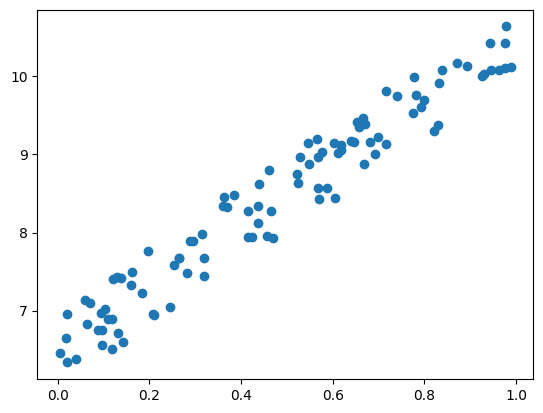

In [11]:
np.random.seed(0)

X = np.random.rand(100, 1)
# print(X.shape)
# print(X)


noise = np.random.rand(100, 1)      # 정규분포 난수를 노이즈로 사용
y = 6 + 4 * X + noise               # 절편이 6? X 개수가 4?

plt.scatter(X, y)
plt.show()

In [13]:
# 경사하강법 실행

# 회귀계수(가중치) 초기화
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

y_pred = w0 + np.dot(X, w1)
diff = y - y_pred

#학습률
learning_rate = 0.01

N = len(X)

# w0 편미분 (w0를 갱신할 값)
w0_diff = -learning_rate * 2 / N * np.sum(diff)
# 절편(w0) 갱신
w0 = w0 - w0_diff

# w1 편미분 (w1를 갱신할 값)
# w1 = w1 - (-학습률 * 2 / N * (x * (실제값 - 예측값))의 합)
w1_diff = - learning_rate * 2 / N * np.dot(X.T,diff)
# 가중치(w1) 갱신
w1 = w1- w1_diff

print(f'1회 업데이트된 회귀계수 w0 : {w0}, w1: {w1}')

1회 업데이트된 회귀계수 w0 : [[0.16838514]], w1: [[0.08615541]]
